In [19]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_height = (3/4)*fig_width # standard ratio
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 7
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 




['CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00133_RPT1_127.0.0.1-BTS83-32-2-3-2818573813.xlsx', 'CEL00134_RPT1_127.0.0.1-BTS83-32-2-4-2818573813.xlsx', 'CEL00135_RPT1_127.0.0.1-BTS83-32-2-5-2818573813.xlsx']


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mid_capacity_voltage_4: 3.7426
Capacity_4: 3.2001
Mid_capacity_voltage_6: 3.7081
Capacity_6: 3.1736
Mid_capacity_voltage_8: 3.759
Capacity_8: 3.1201
Mid_capacity_voltage_10: 3.6886
Capacity_10: 3.0574
Mid_capacity_voltage_12: 3.785
Capacity_12: 2.887
Mid_capacity_voltage_14: 3.63
Capacity_14: 2.8411


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mid_capacity_voltage_4: 3.7447
Capacity_4: 3.1867
Mid_capacity_voltage_6: 3.7091
Capacity_6: 3.1616
Mid_capacity_voltage_8: 3.7602
Capacity_8: 3.1031
Mid_capacity_voltage_10: 3.6861
Capacity_10: 3.0467
Mid_capacity_voltage_12: 3.786
Capacity_12: 2.8627
Mid_capacity_voltage_14: 3.6248
Capacity_14: 2.8225


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mid_capacity_voltage_4: 3.7422
Capacity_4: 3.1913
Mid_capacity_voltage_6: 3.706
Capacity_6: 3.1504
Mid_capacity_voltage_8: 3.7584
Capacity_8: 3.1093
Mid_capacity_voltage_10: 3.6858
Capacity_10: 3.0443
Mid_capacity_voltage_12: 3.7826
Capacity_12: 2.8772
Mid_capacity_voltage_14: 3.6232
Capacity_14: 2.8294


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mid_capacity_voltage_4: 3.7422
Capacity_4: 3.1677
Mid_capacity_voltage_6: 3.7038
Capacity_6: 3.1519
Mid_capacity_voltage_8: 3.7571
Capacity_8: 3.1061
Mid_capacity_voltage_10: 3.6799
Capacity_10: 3.0495
Mid_capacity_voltage_12: 3.7826
Capacity_12: 2.8681
Mid_capacity_voltage_14: 3.6192
Capacity_14: 2.8267


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mid_capacity_voltage_4: 3.7444
Capacity_4: 3.1696
Mid_capacity_voltage_6: 3.705
Capacity_6: 3.1573
Mid_capacity_voltage_8: 3.7587
Capacity_8: 3.1007
Mid_capacity_voltage_10: 3.6818
Capacity_10: 3.0429
Mid_capacity_voltage_12: 3.785
Capacity_12: 2.856
Mid_capacity_voltage_14: 3.617
Capacity_14: 2.8139
   1st_char  1st_dis  2nd_char  2nd_dis  3rd_char  3rd_dis
0    3.7426   3.7081    3.7590   3.6886    3.7850   3.6300
1    3.7447   3.7091    3.7602   3.6861    3.7860   3.6248
2    3.7422   3.7060    3.7584   3.6858    3.7826   3.6232
3    3.7422   3.7038    3.7571   3.6799    3.7826   3.6192
4    3.7444   3.7050    3.7587   3.6818    3.7850   3.6170
   1st_char  1st_dis  2nd_char  2nd_dis  3rd_char  3rd_dis
0    3.2001   3.1736    3.1201   3.0574    2.8870   2.8411
1    3.1867   3.1616    3.1031   3.0467    2.8627   2.8225
2    3.1913   3.1504    3.1093   3.0443    2.8772   2.8294
3    3.1677   3.1519    3.1061   3.0495    2.8681   2.8267
4    3.1696   3.1573    3.1007   3.0429    2.8560

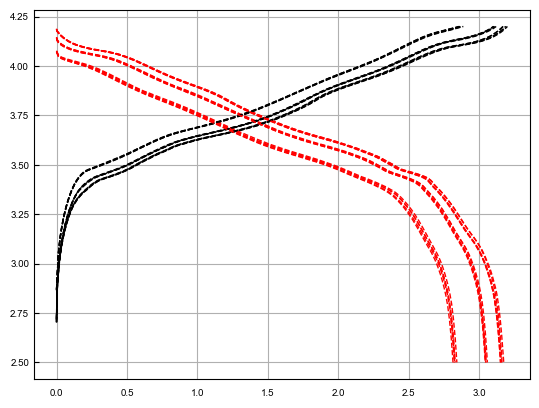

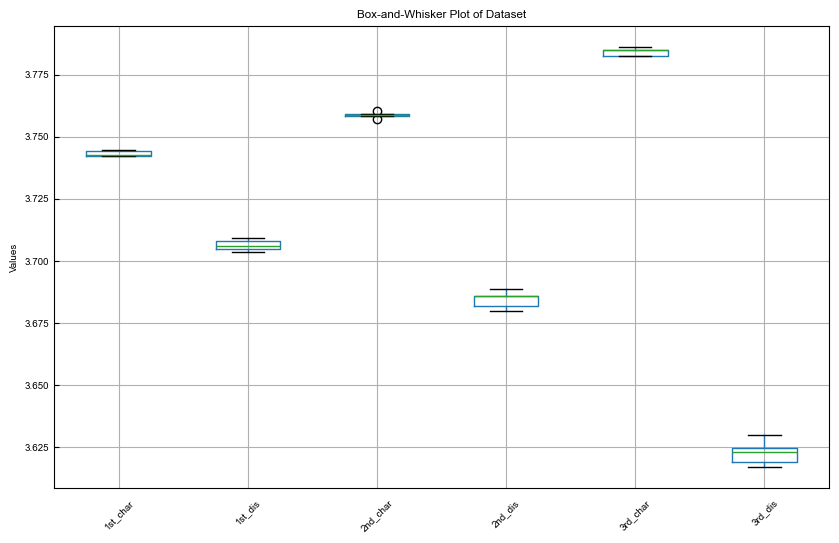

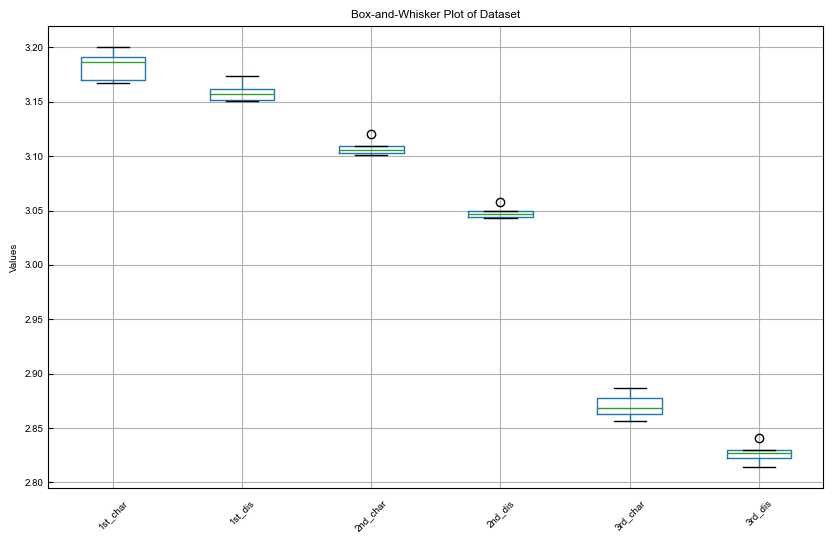

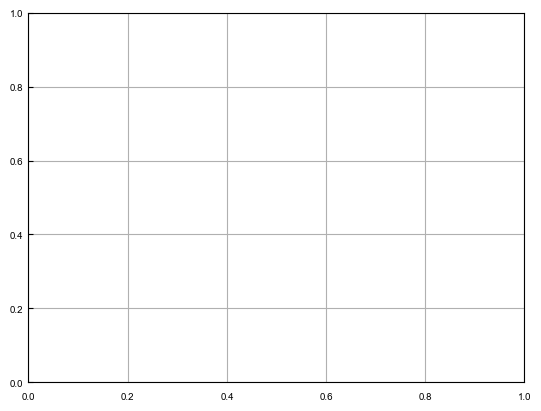

In [22]:
folder_path = os.getcwd()
files = os.listdir(folder_path)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}


for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        
        return voltage_data, capacity_data

    for i, step_index in enumerate([4, 8, 12]):
        filtered_df = filter_data(df, step_index)

    
        plt.plot(filtered_df[1], filtered_df[0] , linestyle='--', linewidth=1, label='Charge', color='black')
    
    for i, step_index in enumerate([6, 10, 14]):
        filtered_df = filter_data(df, step_index)

    
        plt.plot(filtered_df[1], filtered_df[0] , linestyle='--', linewidth=1, label='Charge', color='red')
        plt.grid()


    for i, step_index in enumerate([4, 6, 8, 10, 12, 14]):
        filtered_df = filter_data(df, step_index)
        Capacity = filtered_df[1].iloc[-1]
        Capacity_half = Capacity / 2 
        Mid_capacity_index = ((filtered_df[1] - Capacity_half).abs().idxmin())
        Mid_capacity_voltage = filtered_df[0].iloc[Mid_capacity_index]

        # print(f"Mid_capacity_voltage_{step_index}:", Mid_capacity_voltage)
        # print(f"Capacity_{step_index}:", Capacity)


        OP_50[i].append(Mid_capacity_voltage)
        capacity[i].append(Capacity)

key_mapping = {
    0: "1st_char",
    1: "1st_dis",
    2: "2nd_char",
    3: "2nd_dis",
    4: "3rd_char",
    5: "3rd_dis",
}

OP_50_name = {}
capacity_name = {}

for old_key, new_key in key_mapping.items():
    OP_50_name[new_key] = OP_50.pop(old_key)
    capacity_name[new_key] = capacity.pop(old_key)



df_OP = pd.DataFrame(OP_50_name)
print(df_OP)
df_capacity = pd.DataFrame(capacity_name)
print(df_capacity)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# 엑셀 파일 경로 설정
file_path_export = os.path.join(parent_dir, 'exported_data_1st_RPT.xlsx')

# 데이터프레임을 엑셀 파일로 익스포트
with pd.ExcelWriter(file_path_export) as writer:
    df_capacity.to_excel(writer, sheet_name='Sheet1', index=False)
    df_OP.to_excel(writer, sheet_name='Sheet2', index=False)



plt.figure(figsize=(10, 6))
df_OP.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
df_capacity.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# 결과를 저장할 딕셔너리
dV_results = {}

# 각 경우에 대해 반복
char_keys = ["1st_char", "2nd_char", "3rd_char"]
dis_keys = ["1st_dis", "2nd_dis", "3rd_dis"]
result_labels = ["C20", "C5", "C2"]

# for i, (char_key, dis_key, result_label) in enumerate(zip(char_keys, dis_keys, result_labels)):
#     for j in range(5):
#         dV_results[f'dV_C{j+1}_{result_label}'] = OP_50_name[char_key][j] - OP_50_name[dis_key][j]

# # 결과 출력 (또는 다른 방식으로 사용)
# for key, value in dV_results.items():
#     print(f"{key}: {value}")


plt.grid(True)

In [ ]:
# 두 개의 예제 데이터프레임 생성
df1 = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'Column1': [4, 5, 6],
    'Column2': ['D', 'E', 'F']
})


print(df1)

print(df2)

# ExcelWriter 객체를 사용하여 하나의 엑셀 파일로 저장
with pd.ExcelWriter('output.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False)
    df2.to_excel(writer, sheet_name='Sheet2', index=False)